In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import tree

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier




In [266]:
#internal functions
def get_browser_name(name):
    return name.split('_')[0]

def change_bool_to_binary(label):
  return 1 if label else 0

def remove_minutes_string(df,label):
    return df[label].str.replace(' minutes', '')
     



# Exploration
# Preproccessing
(Outliers, Standardization, Missing Values, Dimensions, Feature Engineering and Test Processing)
# Data Modelling
(Evaluation, Tuning, Predication)

## Load the dataset

In [267]:
data=pd.read_csv("./train.csv")

In [268]:
data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,...,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0


In [290]:
data['purchase'].mean()

0.15469033304704646

#### Lets visualize the visitores we had on our website

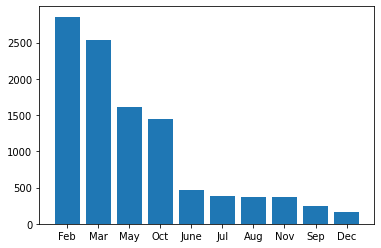

In [276]:
# Values by month
x_labels=data['Month'].dropna().unique()
y_labels=data['Month'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium')
plt.show()
# most of the people are returning users

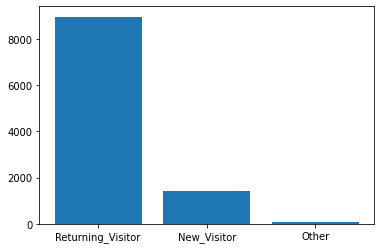

In [277]:
x_labels=data['user_type'].dropna().unique() # we droped the na because is was only 2 rows
y_labels=data['user_type'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium')
plt.show()
# most of the people are returning users

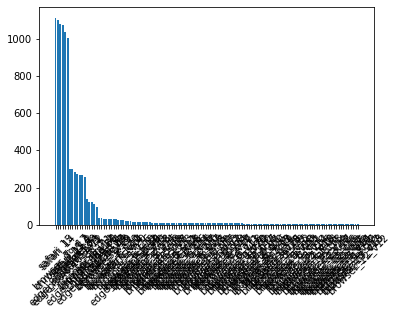

<Figure size 2880x2880 with 0 Axes>

In [278]:
x_labels=data['internet_browser'].dropna().unique() 
y_labels=data['internet_browser'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium',rotation=45)
plt.figure(figsize=(40,40))
# TODO change the size of the figure
plt.show()

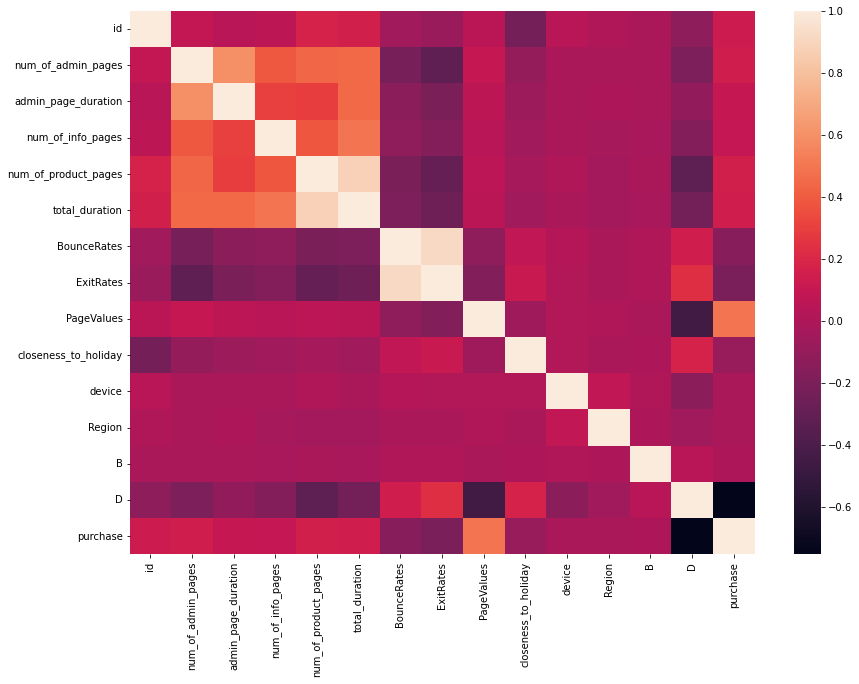

In [279]:
corr = data.corr()

plt.figure(figsize = (14,10))
sns.heatmap(corr, 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)
plt.show()

In [273]:
devices=data['device'].unique()
devices_count=data['device'].value_counts()
devices_count

df=data[['device','internet_browser']]
corr1=df.corr()
df 
# plt.figure(figsize = (14,10))
# sns.heatmap(corr1, 
#         xticklabels=df.corr().columns,
#         yticklabels=df.corr().columns)
# plt.show()

,device,internet_browser
0,1.0,safari_15
1,4.0,safari_14
2,3.0,browser_3_v17
3,2.0,chrome_99.1.3
4,2.0,edge_96.0.1054.75
...,...,...
10474,4.0,browser_6_v12
10475,3.0,chrome_98.0.1
10476,3.0,chrome_99.1.3
10477,2.0,chrome_80


ConversionError: Failed to convert value(s) to axis units: array(['0.0 minutes', '0.0 minutes', nan, ..., '0.0 minutes',
       '0.0 minutes', '0.0 minutes'], dtype=object)

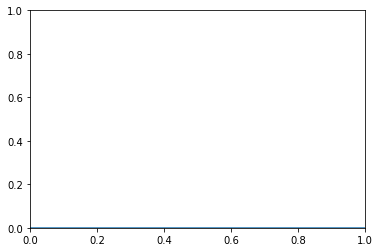

In [299]:
duration_cols=data[[col for col in data.columns if 'duration' in col]]
plt.plot(duration_cols)
plt.show()

In [288]:
data.groupby(['closeness_to_holiday']).mean().sort_values(by='purchase',ascending=False)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,device,Region,B,D,purchase
closeness_to_holiday,,,,,,,,,,,,,,
0.0,5478.406899,2.448308,85.202277,0.526046,32.339520,1339.335349,0.020413,0.040867,6.325311,2.118418,3.162718,99.715344,3.959202,0.165327
0.2,2975.414966,1.669118,62.087281,0.289855,23.506944,1048.624100,0.028699,0.051883,4.281145,2.063380,2.918367,100.388319,3.435172,0.088435
0.6,2979.972414,1.211679,41.205323,0.294340,24.646643,895.628176,0.038347,0.063184,2.732476,2.150000,2.986207,99.126289,7.226965,0.075862
1.0,3089.756098,1.592920,45.318612,0.353448,33.470588,1119.577252,0.026659,0.052945,2.149979,2.146552,3.227642,99.290949,NaN,0.073171
0.4,2976.879397,1.375661,41.955186,0.354839,28.310881,1128.136278,0.038360,0.061747,2.201430,2.104167,3.110553,100.248700,5.034883,0.040201
0.8,3053.830827,1.015936,30.098968,0.232653,27.652344,981.356301,0.035113,0.062143,1.388950,2.255906,3.000000,99.648618,5.264853,0.033835


In [289]:
data.groupby(['Weekend']).mean().sort_values(by='purchase',ascending=False)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
Weekend,,,,,,,,,,,,,,,
True,5357.556936,2.494954,85.386493,0.580889,33.169697,1310.843434,0.017961,0.037499,6.114784,0.054326,2.117848,3.146291,99.823636,4.546667,0.173499
False,5200.847780,2.271325,78.992425,0.479203,31.476006,1300.850707,0.023029,0.044453,5.841860,0.064401,2.124728,3.157600,99.758727,3.931560,0.148862


In [294]:
data.groupby(['Region']).mean()['purchase'].sort_values()

Region
8.0    0.135501
6.0    0.142446
3.0    0.146282
7.0    0.148092
4.0    0.150602
2.0    0.159574
1.0    0.160010
9.0    0.167053
5.0    0.175182
Name: purchase, dtype: float64

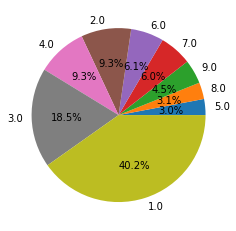

In [300]:
purchase_by_region=data.groupby(['Region']).sum()['purchase'].sort_values()
plt.pie(purchase_by_region,labels=purchase_by_region.index,autopct='%1.1f%%')
plt.show()

### data to remove or change  - Preprocesing
weekend: from true/false to 1/0  
info_page_duration: remove minutes string 

product_page_duration : remove minutes string 

need to think what we want to do with the total duration NAs

  




In [ ]:
labels=data.columns
labels

Index(['id', 'num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages',
       'info_page_duration', 'num_of_product_pages', 'product_page_duration',
       'total_duration', 'BounceRates', 'ExitRates', 'PageValues',
       'closeness_to_holiday', 'Month', 'device', 'internet_browser', 'Region',
       'user_type', 'Weekend', 'A', 'B', 'C', 'D'],
      dtype='object')

In [ ]:
data.describe()
data.shape

(1851, 22)

In [ ]:
data.dtypes

id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
dtype: object

In [ ]:
data.isna().sum()

id                          0
num_of_admin_pages         93
admin_page_duration        78
num_of_info_pages         126
info_page_duration         64
num_of_product_pages       77
product_page_duration     113
total_duration            844
BounceRates                 4
ExitRates                   2
PageValues                  2
closeness_to_holiday       87
Month                       3
device                     64
internet_browser          107
Region                      2
user_type                   2
Weekend                     2
A                         121
B                           2
C                           1
D                        1832
dtype: int64

In [ ]:
data['info_page_duration']=remove_minutes_string(data,'info_page_duration')
data['product_page_duration']=remove_minutes_string(data,'product_page_duration')

In [ ]:
data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
0,0,0.0,0.00,0.0,0.0,2.0,64.0,NaN,0.000000,0.100000,...,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_2,92.487250,log200,NaN
1,1,0.0,0.00,0.0,0.0,2.0,2.666666667,NaN,0.050000,0.140000,...,Feb,3.0,chrome_98.0.1,2.0,Returning_Visitor,False,c_4,120.493478,log400,NaN
2,2,1.0,0.00,0.0,0.0,0.0,NaN,0.000000,0.200000,0.200000,...,Feb,1.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_5,94.120580,log400,NaN
3,3,0.0,NaN,0.0,0.0,2.0,32.0,32.000000,0.000000,0.100000,...,Feb,2.0,chrome_90.1.7,1.0,Returning_Visitor,False,c_3,115.990484,log8080,NaN
4,4,0.0,0.00,0.0,0.0,4.0,63.0,NaN,0.000000,0.050000,...,Feb,2.0,browser_6_v12,1.0,Returning_Visitor,False,c_3,93.866618,log404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1846,0.0,0.00,0.0,0.0,3.0,35.0,35.000000,0.000000,0.066667,...,Nov,4.0,safari_13,1.0,Returning_Visitor,False,c_1,90.187780,log200,NaN
1847,1847,0.0,0.00,0.0,0.0,5.0,108.0,NaN,0.000000,0.040000,...,Dec,2.0,chrome_99.1.4,1.0,New_Visitor,False,c_2,110.914752,log_100,NaN
1848,1848,0.0,0.00,0.0,0.0,39.0,1168.619841,1168.619841,0.000000,0.009064,...,Nov,1.0,safari_14.1,4.0,Returning_Visitor,False,c_3,113.442371,log200,NaN
1849,1849,NaN,19.00,0.0,0.0,45.0,4018.45,4037.450000,0.009091,0.021970,...,Nov,2.0,chrome_99.1.4,3.0,Returning_Visitor,True,c_1,109.357236,log_100,NaN


In [ ]:
data.loc(axis=0)[data['Weekend'].isna()]


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
238,238,3.0,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,...,Mar,4.0,safari_13.1,NaN,Returning_Visitor,NaN,c_2,93.688782,NaN,NaN
927,927,0.0,NaN,NaN,NaN,NaN,NaN,641.516667,0.009524,0.009524,...,NaN,1.0,NaN,1.0,Returning_Visitor,NaN,c_2,112.749303,log200,NaN


#### We are removing those rows for the data since most of the values in these rows are NAN

In [ ]:
data=data.drop(data.index[data['Weekend'].isna()].tolist())
data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
0,0,0.0,0.00,0.0,0.0,2.0,64.0,NaN,0.000000,0.100000,...,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_2,92.487250,log200,NaN
1,1,0.0,0.00,0.0,0.0,2.0,2.666666667,NaN,0.050000,0.140000,...,Feb,3.0,chrome_98.0.1,2.0,Returning_Visitor,False,c_4,120.493478,log400,NaN
2,2,1.0,0.00,0.0,0.0,0.0,NaN,0.000000,0.200000,0.200000,...,Feb,1.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_5,94.120580,log400,NaN
3,3,0.0,NaN,0.0,0.0,2.0,32.0,32.000000,0.000000,0.100000,...,Feb,2.0,chrome_90.1.7,1.0,Returning_Visitor,False,c_3,115.990484,log8080,NaN
4,4,0.0,0.00,0.0,0.0,4.0,63.0,NaN,0.000000,0.050000,...,Feb,2.0,browser_6_v12,1.0,Returning_Visitor,False,c_3,93.866618,log404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1846,0.0,0.00,0.0,0.0,3.0,35.0,35.000000,0.000000,0.066667,...,Nov,4.0,safari_13,1.0,Returning_Visitor,False,c_1,90.187780,log200,NaN
1847,1847,0.0,0.00,0.0,0.0,5.0,108.0,NaN,0.000000,0.040000,...,Dec,2.0,chrome_99.1.4,1.0,New_Visitor,False,c_2,110.914752,log_100,NaN
1848,1848,0.0,0.00,0.0,0.0,39.0,1168.619841,1168.619841,0.000000,0.009064,...,Nov,1.0,safari_14.1,4.0,Returning_Visitor,False,c_3,113.442371,log200,NaN
1849,1849,NaN,19.00,0.0,0.0,45.0,4018.45,4037.450000,0.009091,0.021970,...,Nov,2.0,chrome_99.1.4,3.0,Returning_Visitor,True,c_1,109.357236,log_100,NaN


In [ ]:
data['Weekend']=data['Weekend'].apply(change_bool_to_binary)

In [ ]:
data=data.drop(['D'],axis=1)
data
## remove the columns with missing values D col has 1832 missing values from 1849 rows

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,A,B,C
0,0,0.0,0.00,0.0,0.0,2.0,64.0,NaN,0.000000,0.100000,...,0.0,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,0,c_2,92.487250,log200
1,1,0.0,0.00,0.0,0.0,2.0,2.666666667,NaN,0.050000,0.140000,...,0.0,Feb,3.0,chrome_98.0.1,2.0,Returning_Visitor,0,c_4,120.493478,log400
2,2,1.0,0.00,0.0,0.0,0.0,NaN,0.000000,0.200000,0.200000,...,0.0,Feb,1.0,chrome_99.1.3,1.0,Returning_Visitor,1,c_5,94.120580,log400
3,3,0.0,NaN,0.0,0.0,2.0,32.0,32.000000,0.000000,0.100000,...,0.0,Feb,2.0,chrome_90.1.7,1.0,Returning_Visitor,0,c_3,115.990484,log8080
4,4,0.0,0.00,0.0,0.0,4.0,63.0,NaN,0.000000,0.050000,...,0.2,Feb,2.0,browser_6_v12,1.0,Returning_Visitor,0,c_3,93.866618,log404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1846,0.0,0.00,0.0,0.0,3.0,35.0,35.000000,0.000000,0.066667,...,0.0,Nov,4.0,safari_13,1.0,Returning_Visitor,0,c_1,90.187780,log200
1847,1847,0.0,0.00,0.0,0.0,5.0,108.0,NaN,0.000000,0.040000,...,0.0,Dec,2.0,chrome_99.1.4,1.0,New_Visitor,0,c_2,110.914752,log_100
1848,1848,0.0,0.00,0.0,0.0,39.0,1168.619841,1168.619841,0.000000,0.009064,...,0.0,Nov,1.0,safari_14.1,4.0,Returning_Visitor,0,c_3,113.442371,log200
1849,1849,NaN,19.00,0.0,0.0,45.0,4018.45,4037.450000,0.009091,0.021970,...,0.0,Nov,2.0,chrome_99.1.4,3.0,Returning_Visitor,1,c_1,109.357236,log_100


# Preprocessing

In [ ]:
# we need to define the browsers without the version- it has no meaning
browsers=data['internet_browser'].dropna().unique() 
# print(browsers)
data['internet_browser']=data['internet_browser'].astype(str).apply(get_browser_name)